<h2>Projected limits for axion-electron coupling sensitivity of a LFH</h2>

Sensitivity of a longitudinal ferromagnetic haloscope.

In [372]:
import matplotlib.pyplot as plt
import numpy as np

from PlotFuncs import FigSetup, AxionElectron, MySaveFig

In [459]:
# constants
hbar = 1.05e-34
c = 3e8
e = 1.6e-19
kB = 1.38e-23
gamma = 28e9
eVtoHz = 2.412e14

# axion wind
m_a = 4e-6      # axions mass (eV)
Q_a = 2e6       # axion quality factor
v_a = 1e-3      # axion galactic speed
DM = 3e14       # dark matter density (eV/m^3)
#grad_a = np.sqrt( hbar*c * DM/m_a / (m_a*c) ) * m_a*v_a

# parameters
B0 = 0.4        # static field (T)
Q = 1e4         # quality factor
Tn = 1          # noise temperature (K)
A2 = 1          # tone power (W)
Dt = 1e4        # integration time (s)

mass_range = np.linspace(10e6,3e9,101) / eVtoHz

In [460]:
grad_a

5.019960159204454e-10

In [535]:
def sigma_b(B0, Q, Tn, A2):
    sigma = 2*B0 / (np.pi*Q) * np.sqrt( kB*Tn / A2 )
    return sigma
    
def g_aee(m_a, B0, Q, Tn, A2):
    Ba = 1e-18*m_a
    grad_a = 2*e * Ba / (3e-11*m_a)
    
    RBW = eVtoHz*m_a / Q_a
    dicke_integration = np.sqrt(RBW / Dt)
    b = sigma_b(B0, Q, Tn, A2) * np.sqrt( dicke_integration )
    #print(grad_a)
    #print(b)
    
    g_aee = 2*e * b / grad_a
    return g_aee

In [536]:
g_aee(4e-6, B0, Q, Tn, A2)

1.3300033565406836e-09

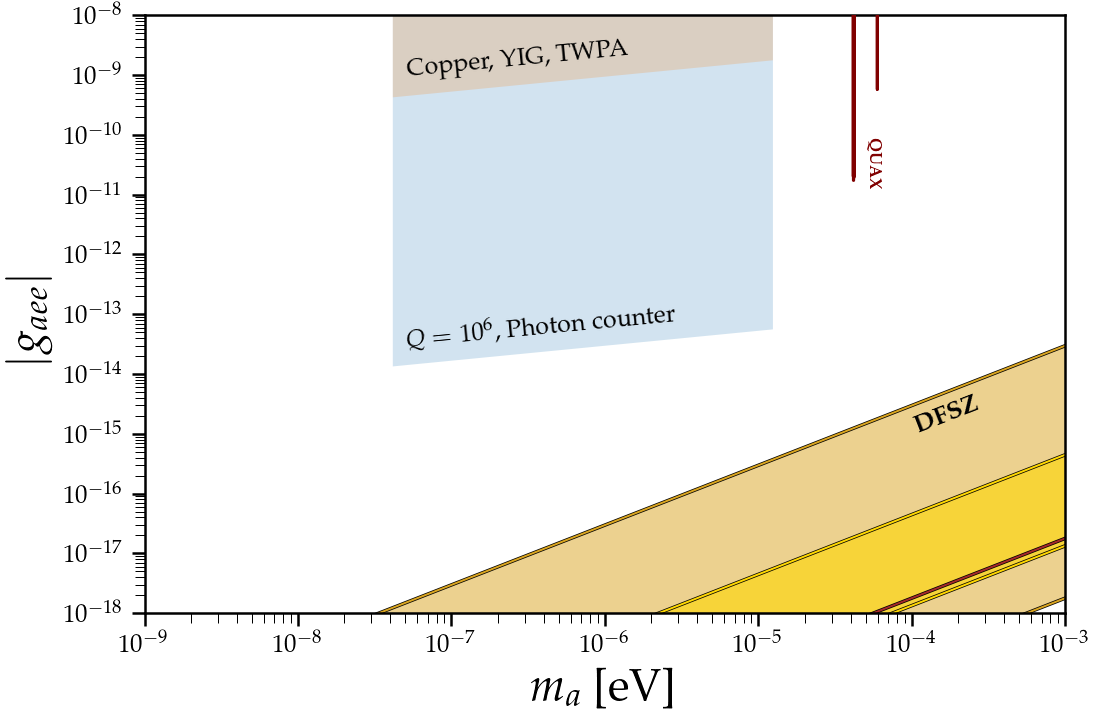

In [539]:
fig,ax = FigSetup(Shape='Rectangular',ylab=r'$|g_{aee}|$',mathpazo=True,
                  g_min=1e-18,g_max=1e-8,m_min=1e-9,m_max=1e-3,xtick_rotation=0)

AxionElectron.QCDAxion(ax)
AxionElectron.QUAX(ax)

ax.fill_between(mass_range, g_aee(mass_range, B0, 100*Q, 1e-4*Tn, 10*A2), y2=1, alpha=0.2)
ax.fill_between(mass_range, g_aee(mass_range, B0, Q, Tn, A2), y2=1, alpha=0.2)
ax.text(5e-8, 1e-9, 'Copper, YIG, TWPA', rotation = 5.5)
ax.text(5e-8, 3e-14, '$Q=10^6$, Photon counter', rotation = 5.5)


plt.savefig('LAD_gaee.png', dpi=300)
#MySaveFig(fig,'LAD_gaee')

In [489]:
hbar = 1.05e-34
c = 3e8
v_a = 1e-3*c

DM = 300e8 * 1e6
m = 200e-6

def grad_a(n_a, m_a):
    grad = np.sqrt( hbar * n_a / (m_a * c)) * m_a*v_a
    
    return grad

grad_a(DM, m)

4.3474130238568323e-10